In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_55fc48a4.png
/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_ac2e711d.png
/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_e46826c9.png
/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_21c38b60.png
/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_f5d58cea.png
/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_ee0ee9a8.png
/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_0c96b662.png
/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_f96e47a5.png
/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_4d412d2a.png
/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_125cac5b.png
/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_4416ab19.png
/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_6c57b9b3.png
/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_d20904e9.png
/kaggle/input/walk-or-run/walk_or_run_test/test/walk/walk_fc359360.png
/kaggl

In [2]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import matplotlib.image as implt
from PIL import Image 
import seaborn as sns
import cv2 as cs2
import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = "../input/walk-or-run/walk_or_run_train/train"
test_data = "../input/walk-or-run/walk_or_run_test/test"

train_run_path = "../input/walk-or-run/walk_or_run_train/train/run"
train_walk_path = "../input/walk-or-run/walk_or_run_train/train/walk"

test_run_path = "../input/walk-or-run/walk_or_run_test/test/run"
test_walk_path = "../input/walk-or-run/walk_or_run_test/test/walk"

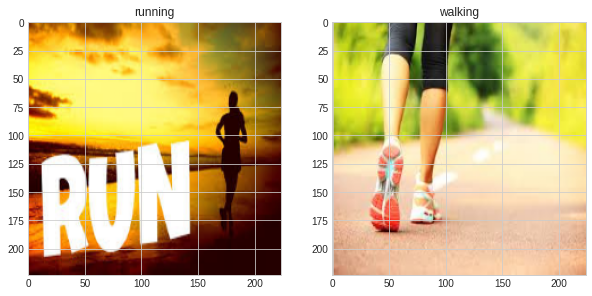

In [4]:
img1 = implt.imread("../input/walk-or-run/walk_or_run_train/train/run/run_01d134fc.png") #run
img2 = implt.imread("../input/walk-or-run/walk_or_run_train/train/walk/walk_00e3d982.png") #walk

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.title('running')
plt.imshow(img1)       
plt.subplot(1, 2, 2)
plt.title('walking')
plt.imshow(img2)
plt.show()

In [5]:
img_size = 50
run_train = []
walk_train = []
label = []

for i in os.listdir(train_run_path): # all train run images
    if os.path.isfile(train_data+"/run/"+i): # check image in file
        run = Image.open(train_data+"/run/"+i).convert("L") # converting grey scale 
        run = run.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 50,50
        run = np.asarray(run)/255 # bit format (RGB)
        run_train.append(run)
        label.append(1)
        
for i in os.listdir(train_walk_path): # all train walk images
    if os.path.isfile(train_data+"/walk/"+i): # check image in file
        walk = Image.open(train_data+"/walk/"+i).convert("L") # converting grey scale 
        walk = walk.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 50,50
        walk = np.asarray(walk)/255 # bit format
        walk_train.append(walk)
        label.append(0)

In [6]:
x_train = np.concatenate((run_train,walk_train),axis=0)
x_train_label = np.asarray(label)
x_train_label = x_train_label.reshape(x_train_label.shape[0],1)

print("run:",np.shape(run_train) , "walk:",np.shape(walk_train))
print("train_dataset:",np.shape(x_train), "train_values:",np.shape(x_train_label))

run: (299, 50, 50) walk: (301, 50, 50)
train_dataset: (600, 50, 50) train_values: (600, 1)


In [7]:
img_size = 50
run_test = []
walk_test = []
label = []

for i in os.listdir(test_run_path): # all train run images
    if os.path.isfile(test_data + "/run/" + i): # check image in file
        run = Image.open(test_data + "/run/" + i).convert("L") # converting grey scale 
        run = run.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 50,50
        run = np.asarray(run)/255 # bit format
        run_test.append(run)
        label.append(1)
        
for i in os.listdir(test_walk_path): # all train walk images
    if os.path.isfile(test_data + "/walk/" + i): # check image in file
        walk = Image.open(test_data + "/walk/" + i).convert("L") # converting grey scale 
        walk = walk.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 50,50
        walk = np.asarray(walk)/255 # bit format
        walk_test.append(walk)
        label.append(0)

In [8]:
x_test = np.concatenate((run_test,walk_test),axis=0)
x_test_label = np.asarray(label)
x_test_label = x_test_label.reshape(x_test_label.shape[0],1)

print("messy:",np.shape(run_test) , "clean:",np.shape(walk_test))
print("train_dataset:",np.shape(x_test), "train_values:",np.shape(x_test_label))

messy: (82, 50, 50) clean: (59, 50, 50)
train_dataset: (141, 50, 50) train_values: (141, 1)


In [9]:
x = np.concatenate((x_train,x_test),axis=0) #train data
# x.shape: 
y = np.concatenate((x_train_label,x_test_label),axis=0)
x = x.reshape(x.shape[0],x.shape[1]*x.shape[2]) # flatten 3D image array to 2D, count
print("images:",np.shape(x), "labels:",np.shape(y))

images: (741, 2500) labels: (741, 1)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

print("Train Number: ", number_of_train)
print("Test Number: ", number_of_test)

Train Number:  629
Test Number:  112


In [11]:
x_train = X_train.T
x_test = X_test.T
y_train = y_train.T
y_test = y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (2500, 629)
x test:  (2500, 112)
y train:  (1, 629)
y test:  (1, 112)


In [12]:
# short description and example of definition (def)
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [13]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [14]:
y_head = sigmoid(0)
y_head

0.5

In [15]:
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

In [16]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [17]:
def update(w, b, x_train, y_train, learning_rate,number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iteration times
    for i in range(number_of_iteration):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [18]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 6.776660
Cost after iteration 10: 0.792607
Cost after iteration 20: 0.782525
Cost after iteration 30: 0.770381
Cost after iteration 40: 0.759611
Cost after iteration 50: 0.750123
Cost after iteration 60: 0.741683
Cost after iteration 70: 0.734062
Cost after iteration 80: 0.727080
Cost after iteration 90: 0.720599
Cost after iteration 100: 0.714519
Cost after iteration 110: 0.708766
Cost after iteration 120: 0.703288
Cost after iteration 130: 0.698045
Cost after iteration 140: 0.693006


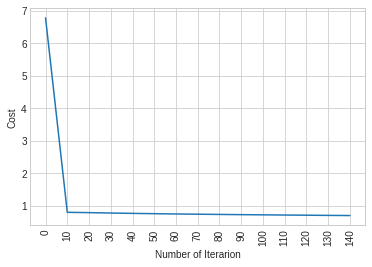

train accuracy: 53.4181240063593 %
test accuracy: 50.0 %


In [19]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

In [20]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.5714285714285714 
train accuracy: 1.0 


Thank you